# Dynamic power and quantization

_23 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

These are the first plots after I implemented dynamic quantization range for the digital scheme, which shouldn't affect dynamic power scheme, but this did involve some refactoring of the dynamic power code to reuse the exponential moving average framework for dynamic quantization in the digital scheme.

Note: These plots increased the dataset size to 20000, since we're only going up to 20 clients.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_evaluation_vs_clients, show_timestamp_info

# Dynamic power, $n = 5$

On commit `8c7cffd`.

In [2]:
results_dir = Path("../results-downloaded/20210722-dynpower-2/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 08:52:50** | 22 Jul 2021, 09:04:22 | 11 min 31 s |
| last to finish | 23 Jul 2021, 00:27:35 | **23 Jul 2021, 01:00:40** | 33 min 05 s |
| shortest | 22 Jul 2021, 17:58:11 | 22 Jul 2021, 18:09:22 | **11 min 10 s** |
| longest | 22 Jul 2021, 14:16:56 | 22 Jul 2021, 14:50:17 | **33 min 21 s** |


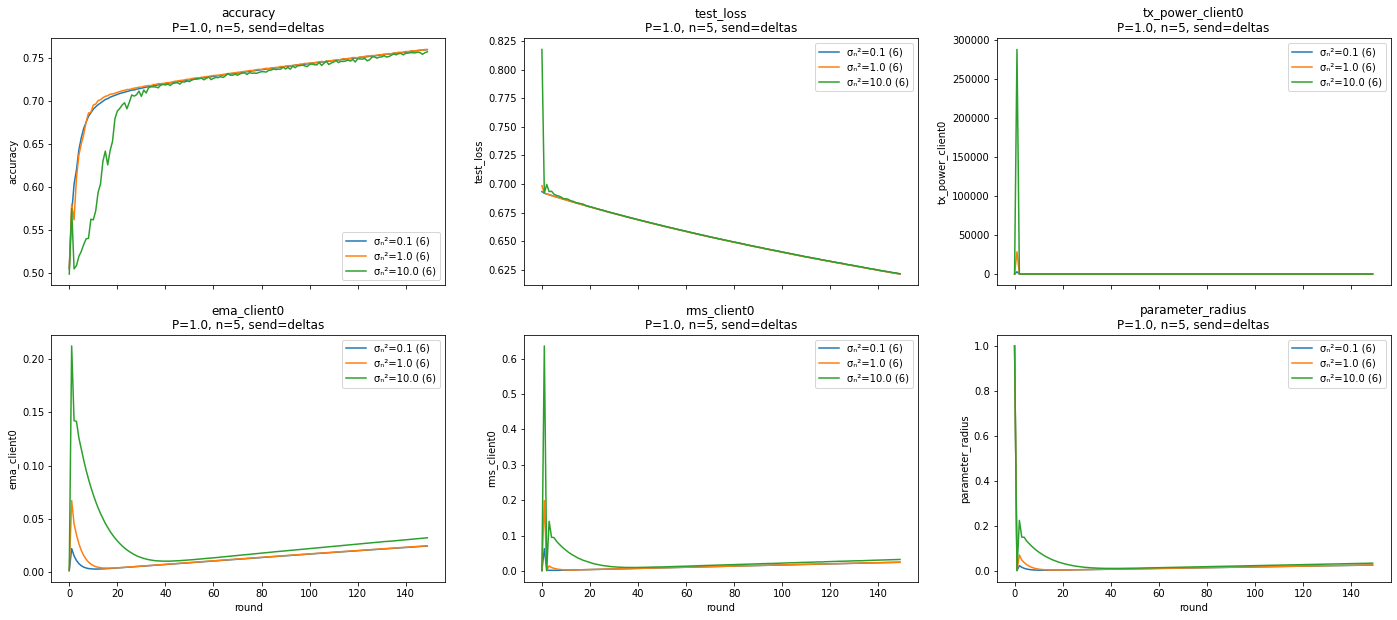

In [3]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'ema_coefficient': 1 / 3,
    'power_update_period': 1,
    'power_quantile': 0.9,
    'power_factor': 0.9,
    'data_per_client': 20000,
}
title_specs = {
    'power': 1.0,
    'clients': 5,
    'send': 'deltas',
}
series_specs = {
    'noise': [0.1, 1.0, 10.0],  # 100 is a disaster and obscures most of these plots for this setting
}
fields = ['accuracy', 'test_loss', 'tx_power_client0', 'ema_client0', 'rms_client0', 'parameter_radius']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

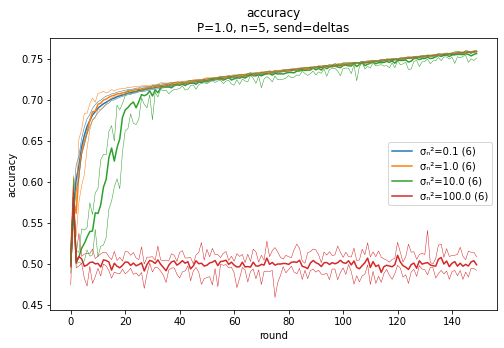

In [4]:
series_specs['noise'] = '__all__'
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

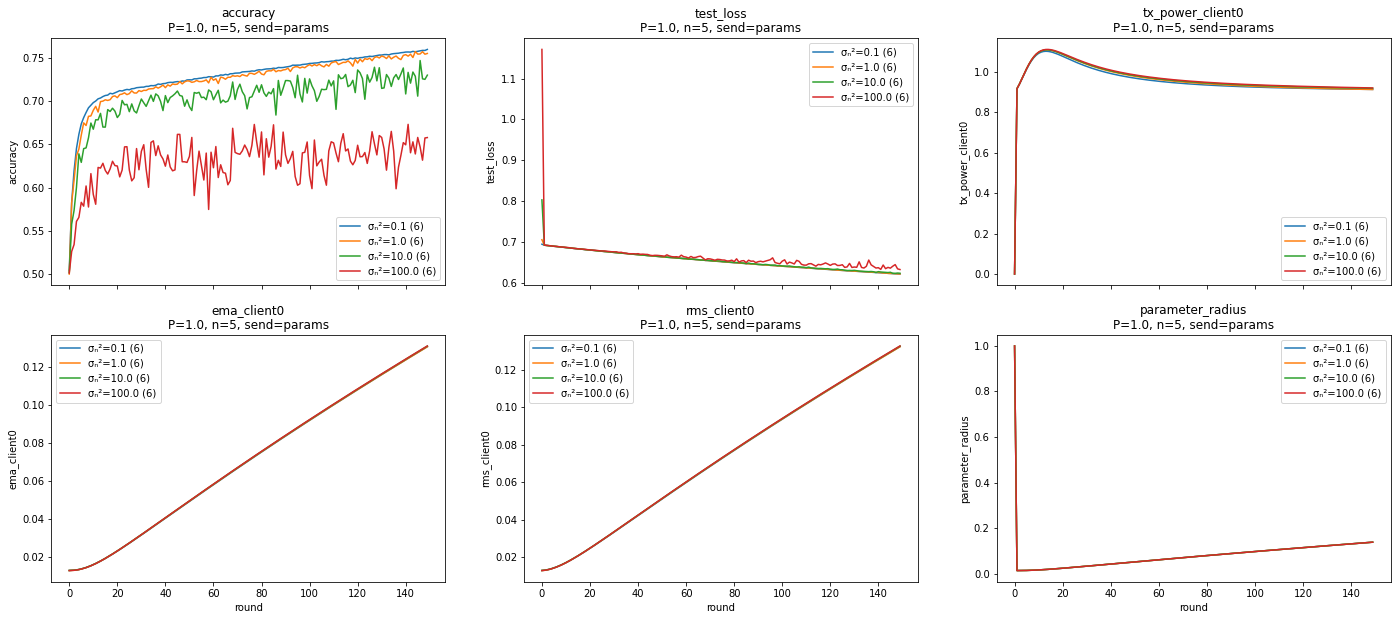

In [5]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# Dynamic power, $n = 20$

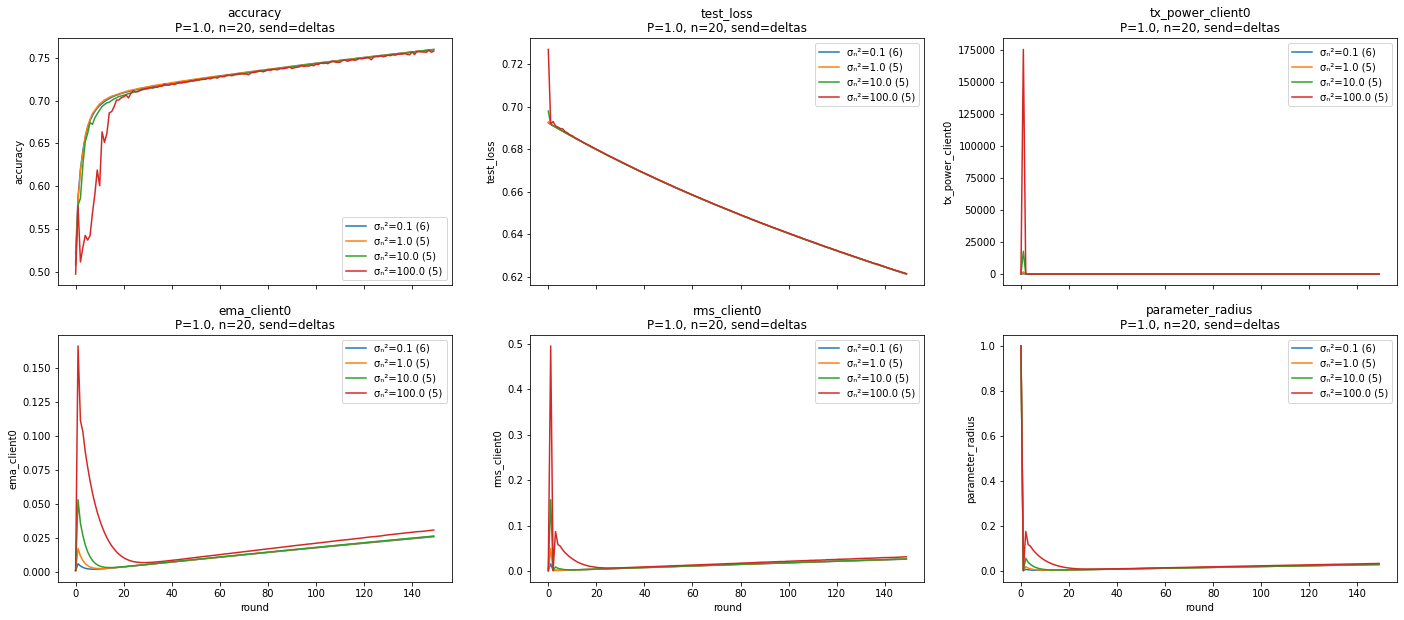

In [6]:
title_specs['clients'] = 20
title_specs['send'] = 'deltas'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

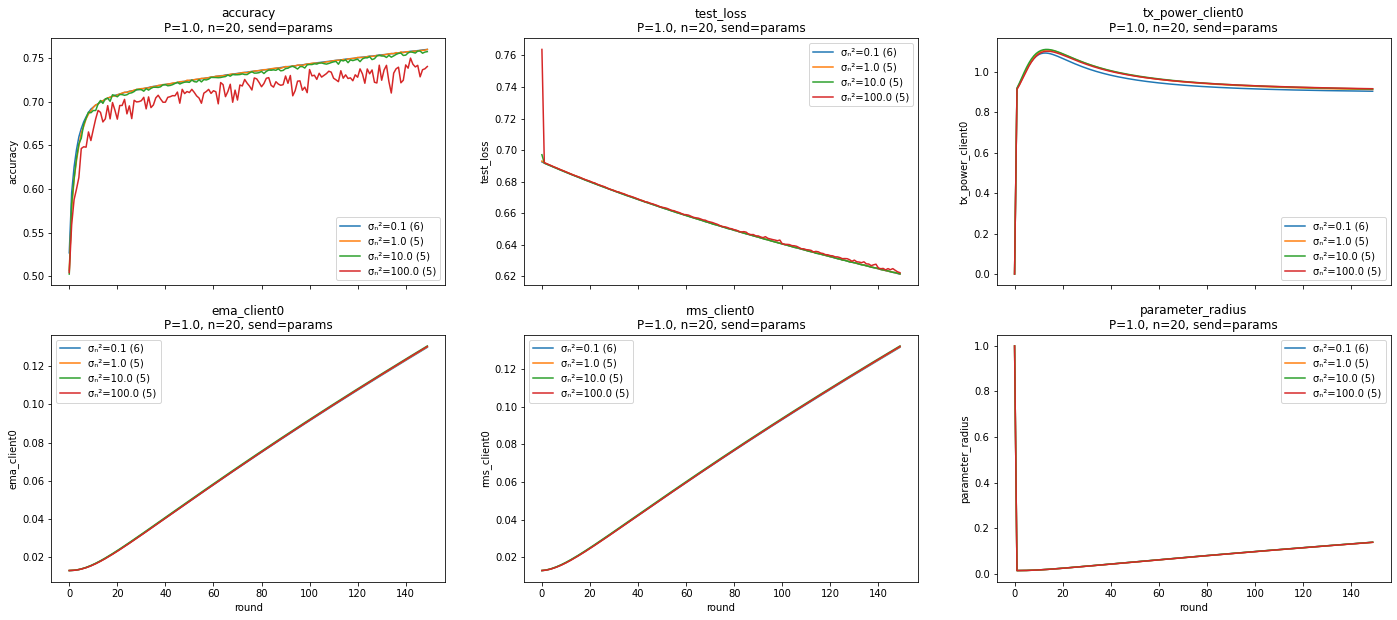

In [7]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

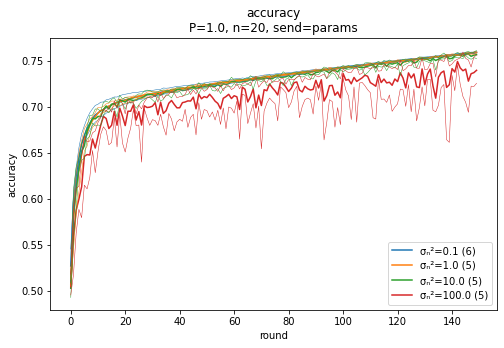

In [8]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

# Dynamic quantization range, $n = 5$

First, the "real" ones, using the `read-zero` option:

In [9]:
results_dir = Path("../results-downloaded/20210722-dynquant/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 08:52:53** | 22 Jul 2021, 09:04:35 | 11 min 42 s |
| last to finish | 23 Jul 2021, 00:47:21 | **23 Jul 2021, 01:21:08** | 33 min 47 s |
| shortest | 22 Jul 2021, 15:07:36 | 22 Jul 2021, 15:18:59 | **11 min 23 s** |
| longest | 22 Jul 2021, 16:49:04 | 22 Jul 2021, 17:23:10 | **34 min 05 s** |


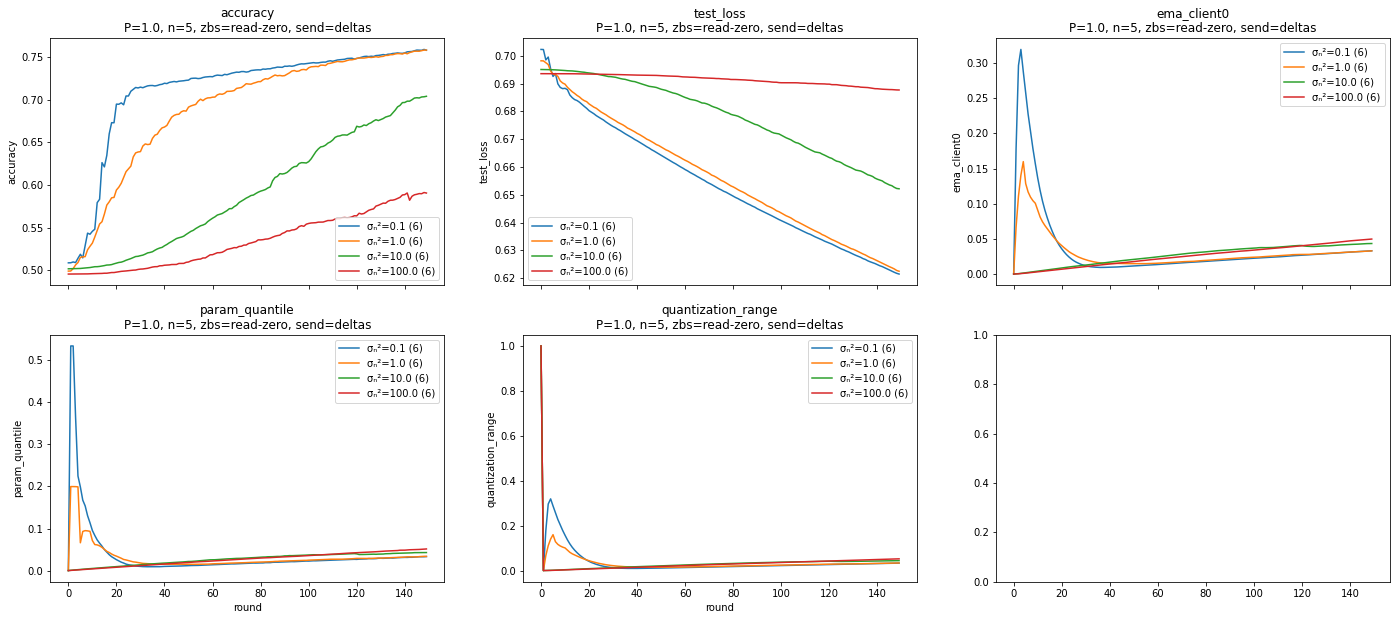

In [10]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'ema_coefficient': 1 / 3,
    'qrange_update_period': 1,
    'qrange_param_quantile': 0.9,
    'qrange_client_quantile': 0.9,
    'data_per_client': 20000,
    'channel_uses': None,
}
title_specs = {
    'power': 1.0,
    'clients': 5,
    'zero_bits_strategy': 'read-zero',
    'send': 'deltas',
}
series_specs = {
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss', 'ema_client0', 'param_quantile', 'quantization_range']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

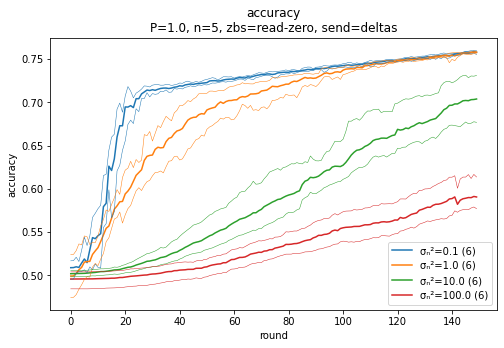

In [11]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

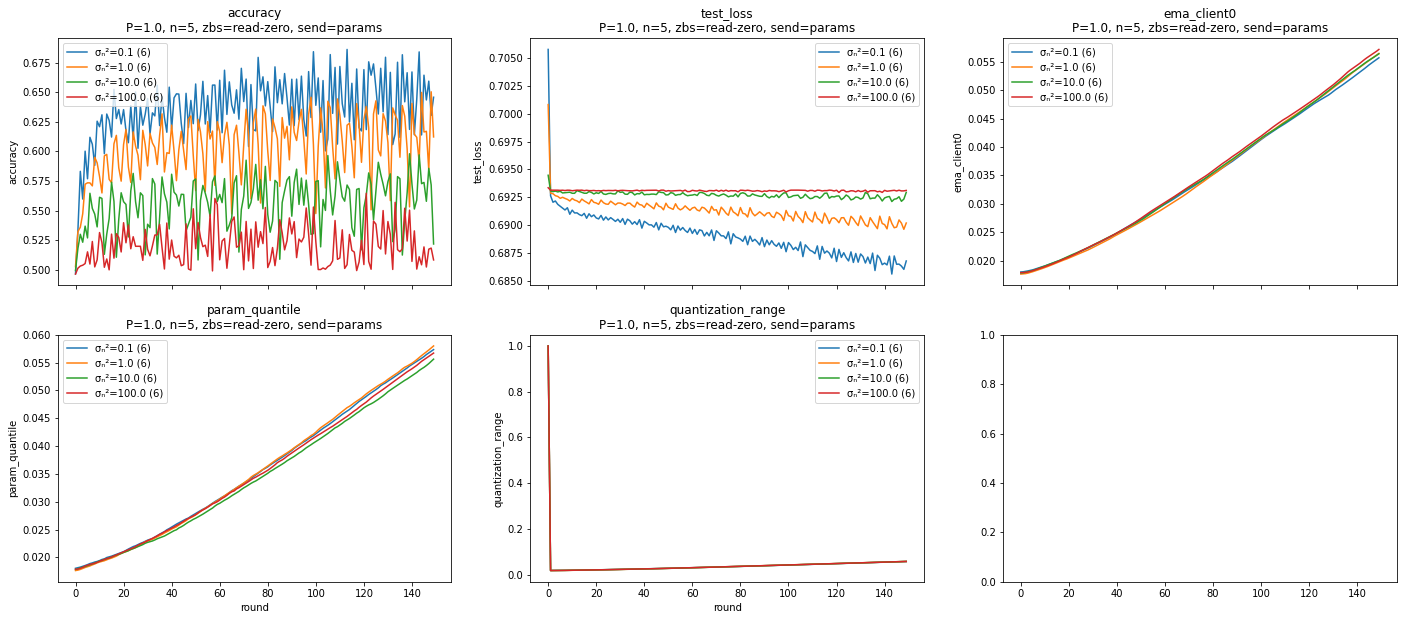

In [12]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

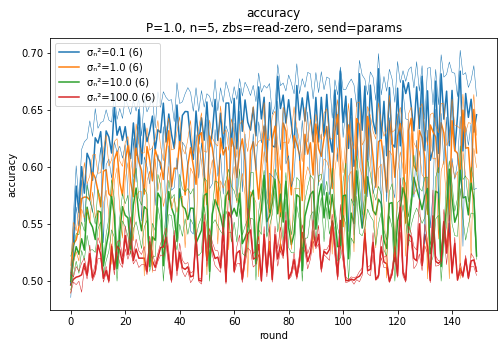

In [13]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

The `min-one` ones perform surprisingly well, but they also (by design) give the digital scheme an unrealistic advantage.

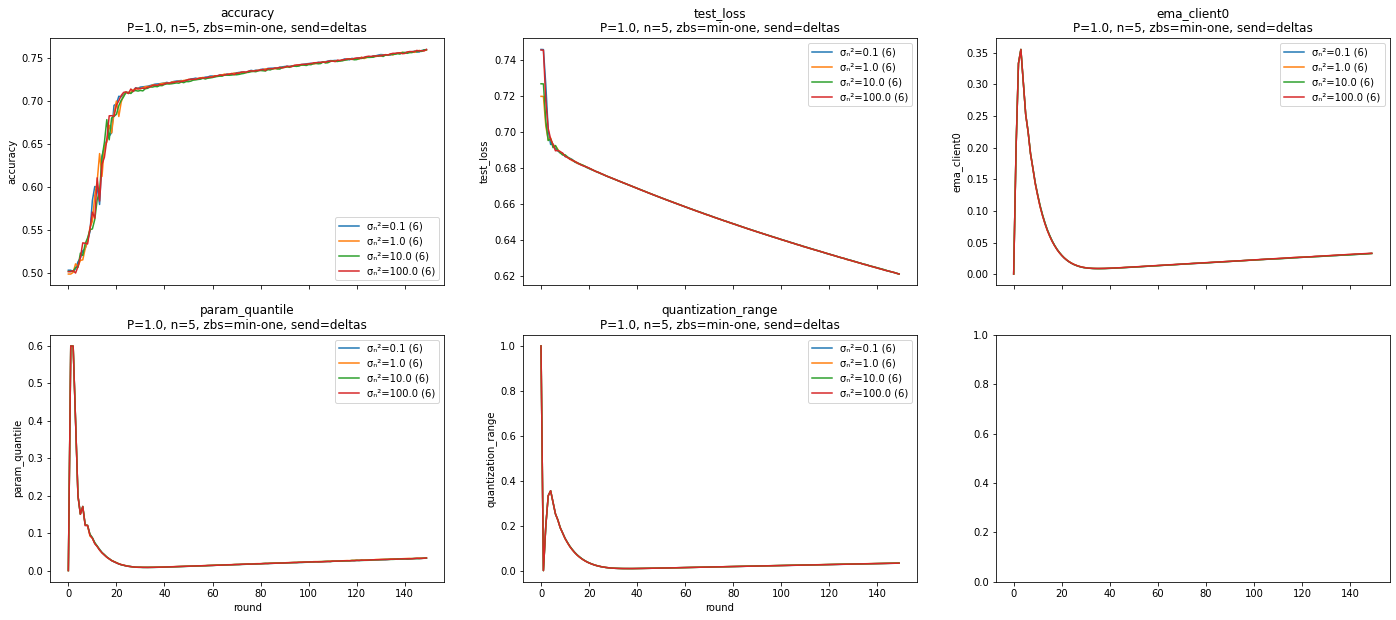

In [14]:
title_specs['zero_bits_strategy'] = 'min-one'
title_specs['send'] = 'deltas'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

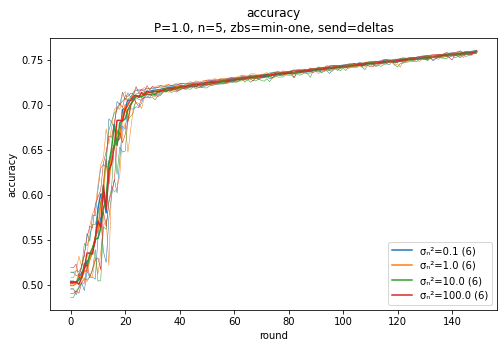

In [15]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

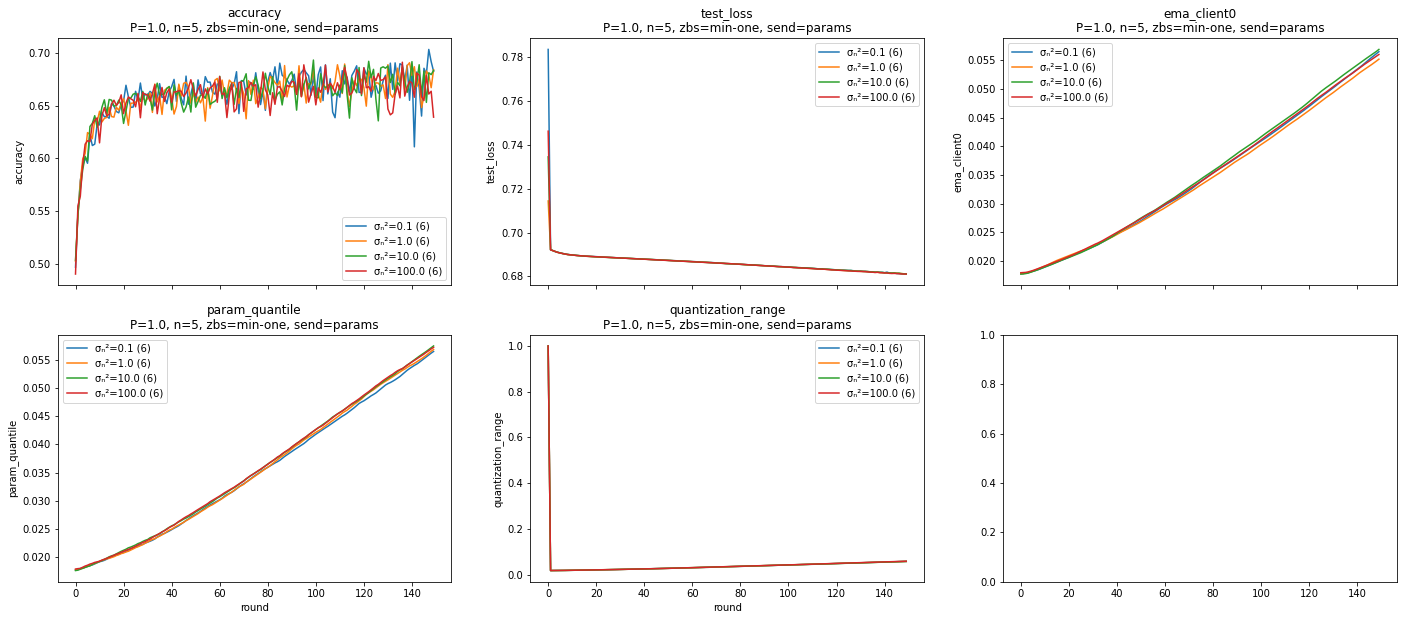

In [16]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

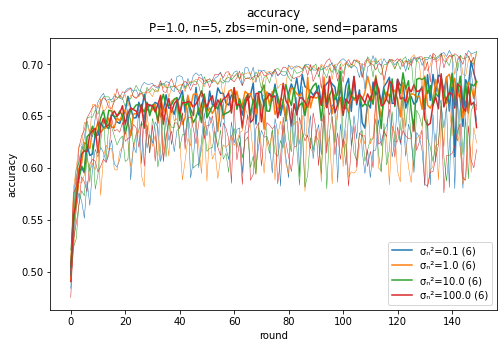

In [17]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

# Dynamic quantization range, $n = 20$

First, the "real" ones, using the `read-zero` option:

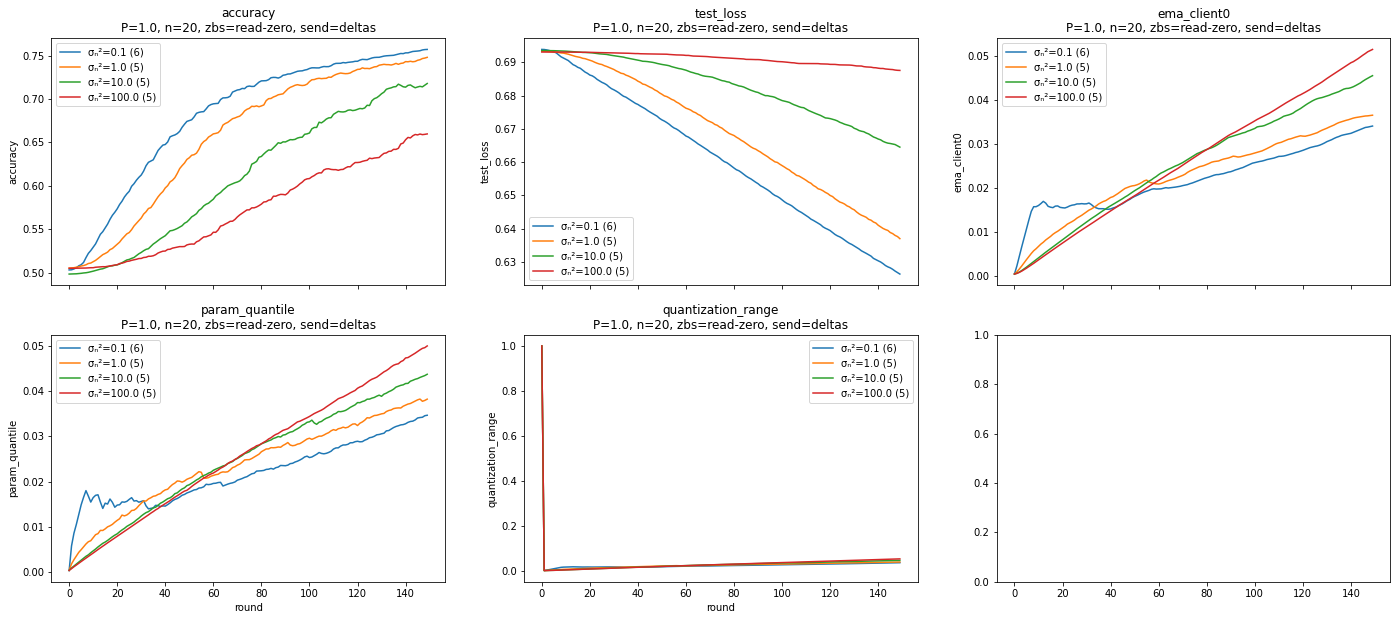

In [18]:
title_specs = {
    'power': 1.0,
    'clients': 20,
    'zero_bits_strategy': 'read-zero',
    'send': 'deltas',
}
data = plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

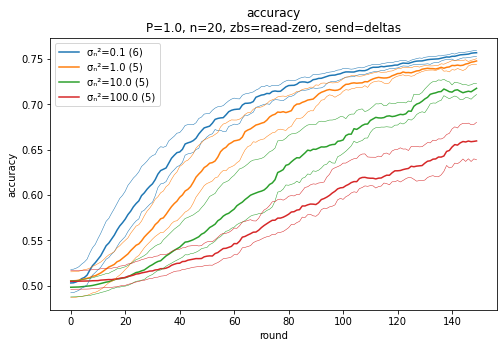

In [19]:
plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs, plot_range=True)

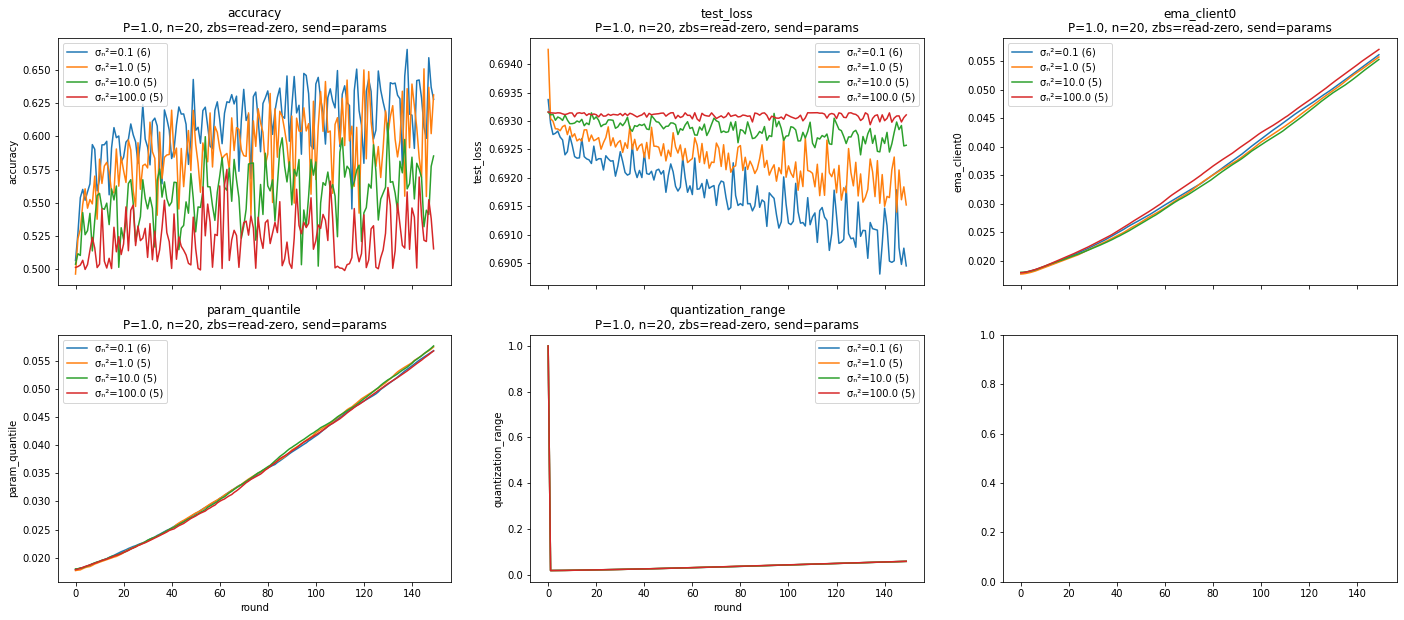

In [20]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

The `min-one` ones perform surprisingly well, but they also (by design) give the digital scheme an unrealistic advantage.

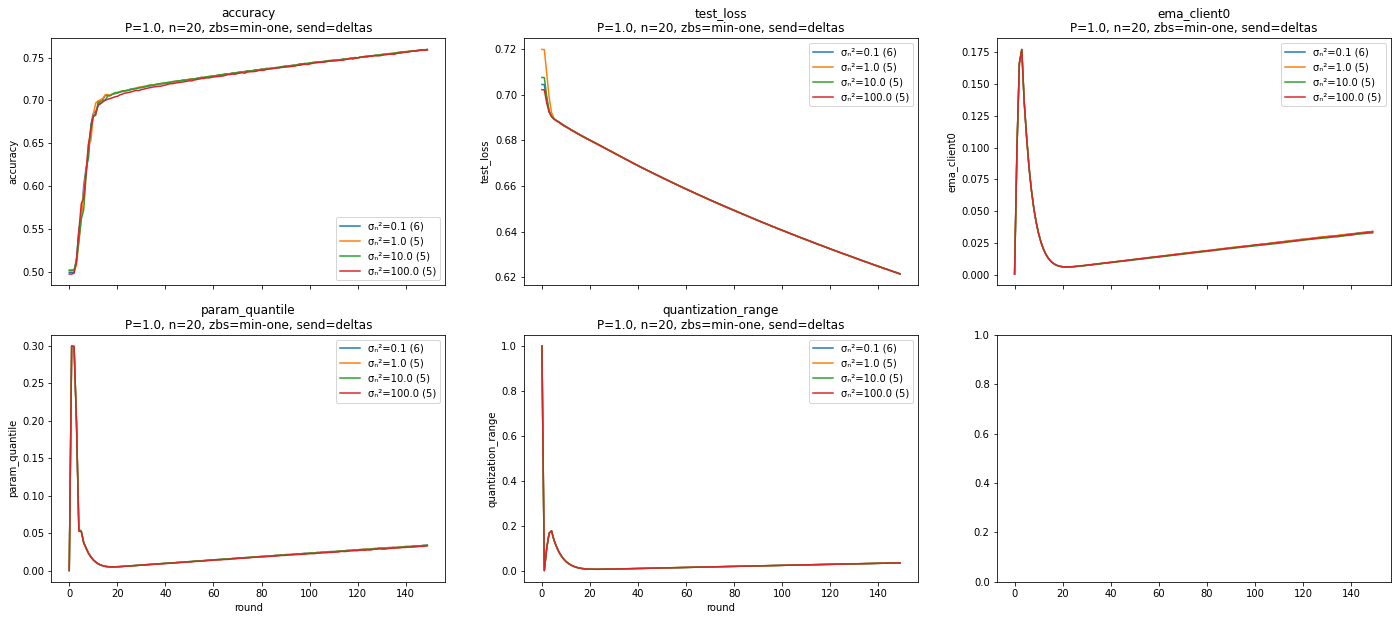

In [21]:
title_specs['zero_bits_strategy'] = 'min-one'
title_specs['send'] = 'deltas'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

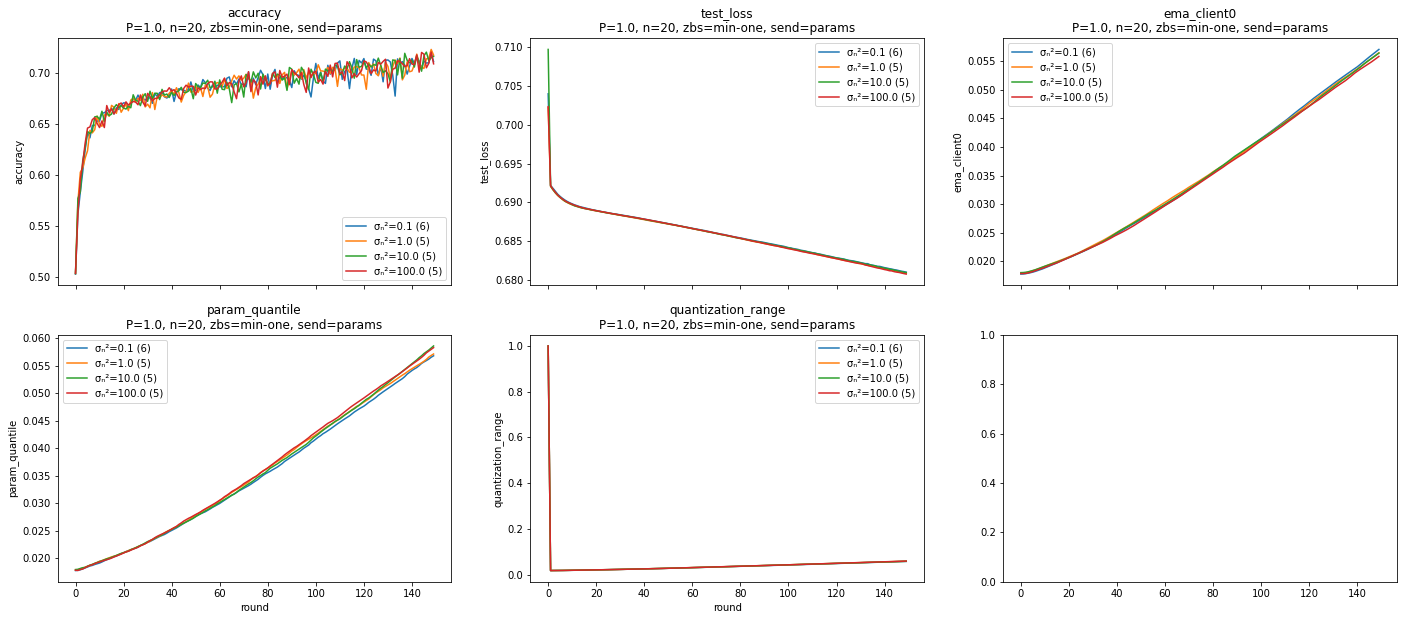

In [22]:
title_specs['send'] = 'params'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

# Bits count

How many bits do we have in each of these settings?

In [23]:
# check in files

from numpy import log2
import pandas as pd
from plots_utils import all_subsubdirectories, get_args, get_eval

seen = []
reports = pd.DataFrame()
s = 2001  # number of channel uses

for directory in all_subsubdirectories(results_dir):
    args = get_args(directory)
    
    P = args['power']
    σₙ2 = args['noise']
    n = args['clients']
    if (P, σₙ2, n) in seen:
        continue
        
    try:
        evaluation = get_eval(directory)
    except FileNotFoundError:
        continue

    index = directory.name
    reports.loc[index, 'P'] = P
    reports.loc[index, 'σₙ²'] = σₙ2
    reports.loc[index, 'n'] = n

    reports.loc[index, 'bpcu eval'] = evaluation['bits_per_channel_use']
    reports.loc[index, 'bpr eval'] = evaluation['bits_per_round']

    seen.append((P, σₙ2, n))

reports['bpcu calc'] = log2(1 + reports['n'] * reports['P'] / reports['σₙ²']) / (2 * reports['n'])
reports['bpr calc'] = reports['bpcu calc'] * s
reports['bpcu diff'] = abs(reports['bpcu calc'] - reports['bpcu eval'])
reports['bpr diff'] = abs(reports['bpr calc'] - reports['bpr eval'])

reports.sort_index()

,P,σₙ²,n,bpcu eval,bpr eval,bpcu calc,bpr calc,bpcu diff,bpr diff
clients-20-noise-0.1-iteration-4,1.0,0.1,20.0,0.191276,382.743861,0.191276,382.743861,2.775558e-17,5.684342e-14
clients-20-noise-1.0-iteration-3,1.0,1.0,20.0,0.109808,219.725679,0.109808,219.725679,0.000000e+00,0.000000e+00
clients-20-noise-10.0-iteration-3,1.0,10.0,20.0,0.039624,79.287749,0.039624,79.287749,0.000000e+00,0.000000e+00
clients-20-noise-100.0-iteration-1,1.0,100.0,20.0,0.006576,13.158296,0.006576,13.158296,0.000000e+00,0.000000e+00
clients-5-noise-0.1-iteration-1,1.0,0.1,5.0,0.567243,1135.052311,0.567243,1135.052311,0.000000e+00,0.000000e+00
clients-5-noise-1.0-iteration-3,1.0,1.0,5.0,0.258496,517.250996,0.258496,517.250996,0.000000e+00,0.000000e+00
clients-5-noise-10.0-iteration-2,1.0,10.0,5.0,0.058496,117.050996,0.058496,117.050996,0.000000e+00,0.000000e+00
clients-5-noise-100.0-iteration-4,1.0,100.0,5.0,0.007039,14.084905,0.007039,14.084905,1.734723e-18,3.552714e-15


# Summary

In [24]:
from plots_utils import collect_all_training_data, aggregate_training_chart_data, specs_string

In [25]:
def plot_comparison(clients, send, zero_bits_strategy, noise, field='accuracy'):
    fig = plt.figure(figsize=(8, 5))
    ax = plt.axes()

    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'lr_client': 0.01,
        'epochs': 1,
        'small': False,
        'ema_coefficient': 1 / 3,
        'data_per_client': 20000,
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': clients,
        'send': send,
    }
    series_specs = {
        'noise': noise,
    }

    analog_path = Path("../results-downloaded/20210722-dynpower-2/")
    analog_data = collect_all_training_data(analog_path, [field], title_specs, fixed_specs, series_specs)
    analog_averages = aggregate_training_chart_data(analog_data, [field], series_specs.keys())[field]

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
    })
    series_specs = {
        'noise': noise,
    }
    title_specs.update({
        'zero_bits_strategy': zero_bits_strategy,
    })

    digital_path = Path("../results-downloaded/20210722-dynquant/")
    digital_data = collect_all_training_data(digital_path, [field], title_specs, fixed_specs, series_specs)
    digital_averages = aggregate_training_chart_data(digital_data, [field], series_specs.keys())[field]
    
    all_averages = analog_averages.join(digital_averages, lsuffix=' analog', rsuffix=' digital')
    all_averages.plot(ax=ax)
    
    title = "analog vs digital\n" + specs_string(title_specs.items())
    plt.title(title)
    plt.xlabel("round")
    plt.ylabel(field)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


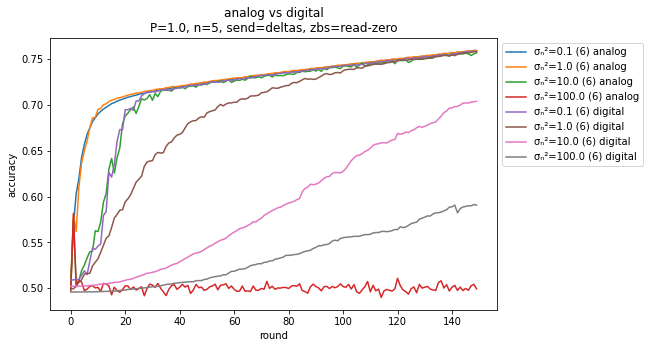

In [26]:
plot_comparison(5, 'deltas', 'read-zero', [0.1, 1, 10, 100])

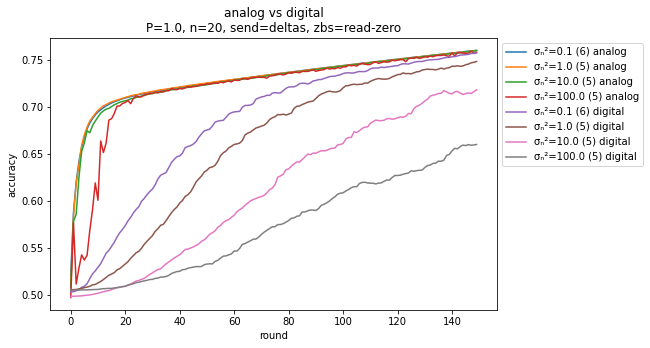

In [27]:
plot_comparison(20, 'deltas', 'read-zero', [0.1, 1, 10, 100])

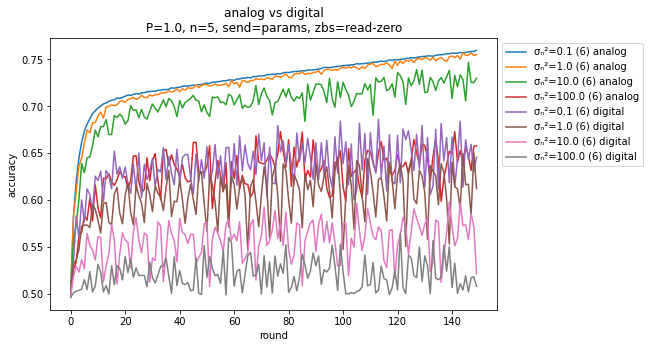

In [28]:
plot_comparison(5, 'params', 'read-zero', [0.1, 1, 10, 100])

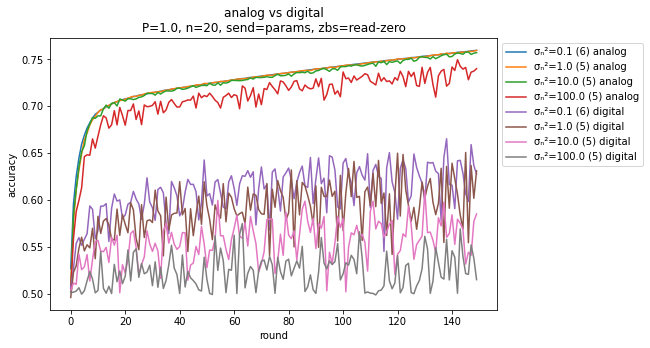

In [29]:
plot_comparison(20, 'params', 'read-zero', [0.1, 1, 10, 100])

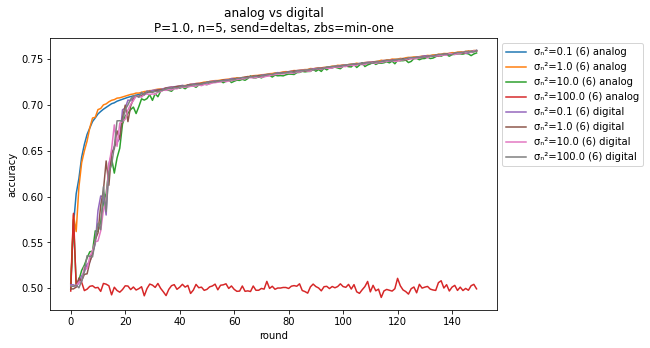

In [30]:
plot_comparison(5, 'deltas', 'min-one', [0.1, 1, 10, 100])

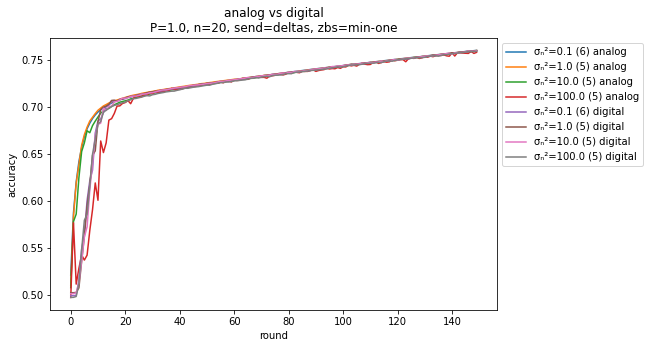

In [31]:
plot_comparison(20, 'deltas', 'min-one', [0.1, 1, 10, 100])

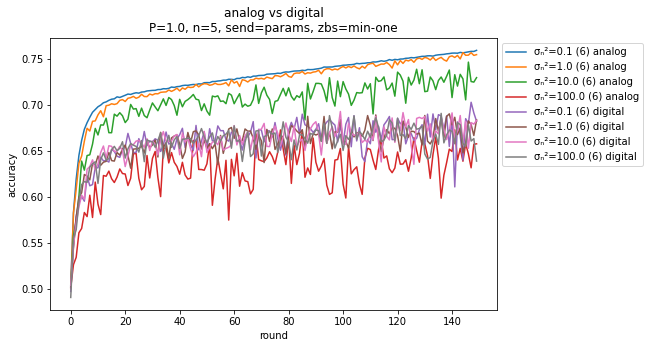

In [32]:
plot_comparison(5, 'params', 'min-one', [0.1, 1, 10, 100])

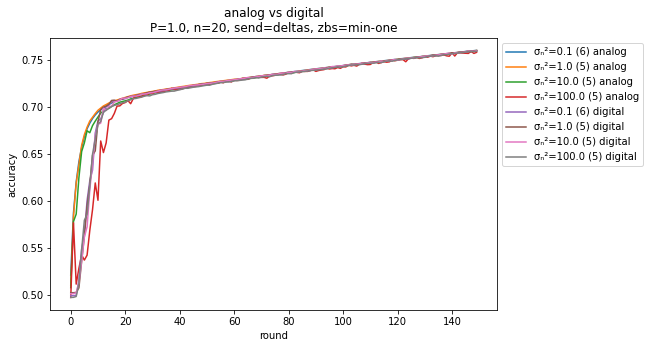

In [33]:
plot_comparison(20, 'deltas', 'min-one', [0.1, 1, 10, 100])